Importing data from yfinance

In [1]:
try:
  import yfinance as yf
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
except ModuleNotFoundError:
  %pip install yfinance
  %pip install numpy
  %pip install seaborn
  %pip install pandas==1.5.3
  import numpy as np
  import seaborn as sns
  import yfinance as yf

/home/ale/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
rounds=14
ticker = 'BTC-USD'
fast_period , slow_period = 20, 60
sigma = 40

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# we are performing the operation
# mean() function finds the mean over each window
data[f'SMA_{fast_period}']=data.Close.rolling(fast_period).mean()
data[f'SMA_{slow_period}']=data.Close.rolling(slow_period).mean()
data[f'Intersection_{fast_period}_{slow_period}']=data[f'SMA_{fast_period}']/data[f'SMA_{slow_period}']* 100-100
data

,Open,High,Low,Close,Volume,SMA_20,SMA_60,Intersection_20_60
Date,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,10446520040,27978.149219,26927.201497,3.902922
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28260.962012,27042.599186,4.505347
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28566.068652,27173.496842,5.124743


In [4]:
#RSI
data['diff']= data.Close.diff()
data['win']= np.where(data['diff']>0,data['diff'],0)
data['loss']= np.where(data['diff']<0,abs(data['diff']),0)
data['EMA_win'] = data.win.ewm(alpha=1/rounds).mean()
data['EMA_loss'] = data.loss.ewm(alpha=1/rounds).mean()
data['RS'] = data.EMA_win / data.EMA_loss
data['RSI'] = 100 - (100 /(1+data.RS)) #TODO: Check vs alphavantage API
data


,Open,High,Low,Close,Volume,SMA_20,SMA_60,Intersection_20_60,diff,win,loss,EMA_win,EMA_loss,RS,RSI
Date,,,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,NaN,NaN,NaN,-214.704102,0.000000,214.704102,0.000000,111.328053,0.000000,0.000000
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,NaN,NaN,NaN,359.414062,359.414062,0.000000,128.784564,71.437196,1.802766,64.320963
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,NaN,NaN,NaN,65.772461,65.772461,0.000000,111.239641,51.546413,2.158048,68.334871
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,NaN,NaN,NaN,0.660645,0.660645,0.000000,85.730861,39.655492,2.161891,68.373359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,10446520040,27978.149219,26927.201497,3.902922,75.484375,75.484375,0.000000,241.286029,82.871557,2.911566,74.434793
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28260.962012,27042.599186,4.505347,3092.337891,3092.337891,0.000000,444.932591,76.952160,5.781938,85.254951
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28566.068652,27173.496842,5.124743,815.292969,815.292969,0.000000,471.386904,71.455577,6.596923,86.836775


In [5]:
# volatility
data['var'] = data.Close.pct_change()*100 # The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.
data[f'sigma_{sigma}'] = data['var'].rolling(sigma).std()*(sigma**0.5)
data

,Open,High,Low,Close,Volume,SMA_20,SMA_60,Intersection_20_60,diff,win,loss,EMA_win,EMA_loss,RS,RSI,var,sigma_40
Date,,,,,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,NaN,NaN,NaN,-214.704102,0.000000,214.704102,0.000000,111.328053,0.000000,0.000000,-2.981929,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,NaN,NaN,NaN,359.414062,359.414062,0.000000,128.784564,71.437196,1.802766,64.320963,5.145166,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,NaN,NaN,NaN,65.772461,65.772461,0.000000,111.239641,51.546413,2.158048,68.334871,0.895487,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,NaN,NaN,NaN,0.660645,0.660645,0.000000,85.730861,39.655492,2.161891,68.373359,0.008915,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,10446520040,27978.149219,26927.201497,3.902922,75.484375,75.484375,0.000000,241.286029,82.871557,2.911566,74.434793,0.252301,9.350969
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28260.962012,27042.599186,4.505347,3092.337891,3092.337891,0.000000,444.932591,76.952160,5.781938,85.254951,10.309891,13.607316
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28566.068652,27173.496842,5.124743,815.292969,815.292969,0.000000,471.386904,71.455577,6.596923,86.836775,2.464146,13.722873


In [6]:
data['fw_10'] = (data.Close.shift(-10) / data.Close.shift() - 1 )*100
data['fw_20'] = (data.Close.shift(-20) / data.Close.shift() - 1 )*100
data

,Open,High,Low,Close,Volume,SMA_20,SMA_60,Intersection_20_60,diff,win,loss,EMA_win,EMA_loss,RS,RSI,var,sigma_40,fw_10,fw_20
Date,,,,,,,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,NaN,NaN,NaN,-214.704102,0.000000,214.704102,0.000000,111.328053,0.000000,0.000000,-2.981929,NaN,13.781886,20.564803
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,NaN,NaN,NaN,359.414062,359.414062,0.000000,128.784564,71.437196,1.802766,64.320963,5.145166,NaN,16.587632,20.342874
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,NaN,NaN,NaN,65.772461,65.772461,0.000000,111.239641,51.546413,2.158048,68.334871,0.895487,NaN,20.189295,14.983902
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,NaN,NaN,NaN,0.660645,0.660645,0.000000,85.730861,39.655492,2.161891,68.373359,0.008915,NaN,18.842514,12.916411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,10446520040,27978.149219,26927.201497,3.902922,75.484375,75.484375,0.000000,241.286029,82.871557,2.911566,74.434793,0.252301,9.350969,NaN,NaN
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28260.962012,27042.599186,4.505347,3092.337891,3092.337891,0.000000,444.932591,76.952160,5.781938,85.254951,10.309891,13.607316,NaN,NaN
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28566.068652,27173.496842,5.124743,815.292969,815.292969,0.000000,471.386904,71.455577,6.596923,86.836775,2.464146,13.722873,NaN,NaN


In [7]:
# Cleaning cols
cols = ['Close',f'Intersection_{fast_period}_{slow_period}','RSI',f'sigma_{sigma}','var','fw_10','fw_20']
data = data.loc[:,cols].dropna().round(4)
data

,Close,Intersection_20_60,RSI,sigma_40,var,fw_10,fw_20
Date,,,,,,,
2020-02-29,8599.5088,7.3266,34.8640,16.0646,-0.8411,-8.7948,-28.5234
2020-03-01,8562.4541,6.3382,34.3607,16.0370,-0.4309,-8.0014,-28.0765
2020-03-02,8869.6699,5.2288,41.8549,16.4174,3.5879,-41.9467,-31.9091
2020-03-03,8787.7861,4.1015,40.5267,16.1132,-0.9232,-37.2727,-27.6600
2020-03-04,8755.2461,3.0422,39.9838,16.1178,-0.3703,-40.8228,-23.3618
...,...,...,...,...,...,...,...
2023-10-02,27530.7852,-0.9627,60.0032,11.2754,-1.6187,-4.3845,7.1833
2023-10-03,27429.9785,-0.6393,58.4849,11.2267,-0.3662,-2.4279,20.1790
2023-10-04,27799.3945,-0.3293,62.2542,11.2752,1.3468,-2.0717,23.5930


In [8]:
# Fixing look-ahead bias
# operate today with the indicators of the past
data.iloc[:,1:-1].shift()
data

,Close,Intersection_20_60,RSI,sigma_40,var,fw_10,fw_20
Date,,,,,,,
2020-02-29,8599.5088,7.3266,34.8640,16.0646,-0.8411,-8.7948,-28.5234
2020-03-01,8562.4541,6.3382,34.3607,16.0370,-0.4309,-8.0014,-28.0765
2020-03-02,8869.6699,5.2288,41.8549,16.4174,3.5879,-41.9467,-31.9091
2020-03-03,8787.7861,4.1015,40.5267,16.1132,-0.9232,-37.2727,-27.6600
2020-03-04,8755.2461,3.0422,39.9838,16.1178,-0.3703,-40.8228,-23.3618
...,...,...,...,...,...,...,...
2023-10-02,27530.7852,-0.9627,60.0032,11.2754,-1.6187,-4.3845,7.1833
2023-10-03,27429.9785,-0.6393,58.4849,11.2267,-0.3662,-2.4279,20.1790
2023-10-04,27799.3945,-0.3293,62.2542,11.2752,1.3468,-2.0717,23.5930


In [9]:
#R2 vs features
features = [f'Intersection_{fast_period}_{slow_period}','RSI',f'sigma_{sigma}'] 
data.corr().loc[['fw_10','fw_20'],features].round(2)


,Intersection_20_60,RSI,sigma_40
fw_10,0.11,0.19,0.11
fw_20,0.16,0.18,0.13


#### ¿Para que me sirve saber la correlación de features vs variacion de los datos?
Saber la correlación entre las características (features) y la variación de los datos es importante en el contexto del análisis de datos y la modelación estadística. La correlación entre las características y la variación de los datos puede proporcionar información valiosa sobre cómo las características afectan la variabilidad de los datos y cómo se relacionan entre sí. Aquí hay algunas formas en las que esta información puede ser útil:

* Selección de características: Al analizar la correlación entre las características y la variación de los datos, puedes identificar qué características están fuertemente relacionadas con la variabilidad de los datos y cuáles tienen poca influencia. Esto te ayuda a tomar decisiones informadas sobre qué características incluir o excluir en un modelo de análisis de datos. Por lo general, se prefieren características que están más correlacionadas con la variabilidad de los datos, ya que pueden ser más informativas.

* Detección de multicolinealidad: La correlación entre características también puede ayudarte a identificar multicolinealidad, que es cuando dos o más características están altamente correlacionadas entre sí. La multicolinealidad puede ser problemática en modelos estadísticos, ya que puede hacer que sea difícil discernir la contribución individual de cada característica a la variabilidad de los datos. Identificar esta situación te permite tomar medidas para abordarla, como eliminar una de las características altamente correlacionadas o combinarlas de alguna manera.

* Interpretación de resultados: Cuando construyes modelos estadísticos o de aprendizaje automático, entender cómo las características se correlacionan con la variabilidad de los datos te permite interpretar los resultados de manera más efectiva. Puedes determinar qué características tienen un impacto positivo o negativo en la variabilidad y cómo se relacionan con la variable objetivo que estás tratando de predecir.

* Optimización de modelos: Al comprender la relación entre las características y la variación de los datos, puedes ajustar tus modelos para mejorar su rendimiento. Por ejemplo, puedes realizar ingeniería de características o seleccionar un subconjunto de características que sean más relevantes, lo que puede llevar a modelos más eficaces y eficientes.

### Clasificaciones diferenciables

In [10]:
data['var_type'] = np.where(data['var'] > 0,'Up','Down')

means = data.groupby('var_type').mean().loc[:,features].round(2)
deviations = data.groupby('var_type').std().loc[:,features].round(2)
print(f"Medias según clasificacion de variacion \n {means} \n")
print(f"Desvios según clasificacion de variacion \n {deviations} \n")

Medias según clasificacion de variacion 
           Intersection_20_60    RSI  sigma_40
var_type                                     
Down                    1.48  48.73     21.01
Up                      2.04  55.06     21.18 

Desvios según clasificacion de variacion 
           Intersection_20_60    RSI  sigma_40
var_type                                     
Down                   11.90  12.81      8.12
Up                     11.92  14.02      8.01 



A priori RSI seria el mejores clasificadores porque pasa de 0.9 a 1.1 (22%) //TODO: ver por que

Supongamos que tienes dos distribuciones de datos, una para la Clase A y otra para la Clase B. Para calcular la distancia entre sus medias en unidades de desviación estándar, sigue estos pasos:

1. Calcula la media (promedio) y la desviación estándar de cada una de las dos distribuciones, es decir, la Clase A y la Clase B.

2. Calcula la diferencia entre las medias de las dos distribuciones: Diferencia de Medias = Media Clase A - Media Clase B.

3. Luego, calcula la desviación estándar combinada (poblacional o muestral, según corresponda) de ambas distribuciones. Puedes utilizar la fórmula para la desviación estándar combinada.

4. Divide la Diferencia de Medias entre la Desviación Estándar Combinada: Distancia en Desviaciones Estándar = Diferencia de Medias / Desviación Estándar Combinada.

In [11]:
# Crear un DataFrame para almacenar las distancias en desviaciones estándar
distancias_en_desviaciones_std = pd.DataFrame(index=features, columns=['Distancia'])

# Iterar a través de las características y calcular la distancia en desviaciones estándar
for feature in features:
    diferencia_de_medias = means.loc['Up', feature] - means.loc['Down', feature]
    desviacion_std_combinada = np.sqrt(((len(data[data['var_type'] == 'Up']) - 1) * deviations.loc['Up', feature]**2 + (len(data[data['var_type'] == 'Down']) - 1) * deviations.loc['Down', feature]**2) / (len(data) - 2))
    distancia_en_desviaciones_std = diferencia_de_medias / desviacion_std_combinada
    distancias_en_desviaciones_std.loc[feature, 'Distancia'] = distancia_en_desviaciones_std

# Imprime el DataFrame con las distancias en desviaciones estándar
print(distancias_en_desviaciones_std)

                   Distancia
Intersection_20_60  0.047019
RSI                  0.47109
sigma_40             0.02108


En terminos de desviacion estandar RSI sigue siendo el mejor porque es el que menos solapa las dos distribuciones. Graficamente lo podemos ver asi:

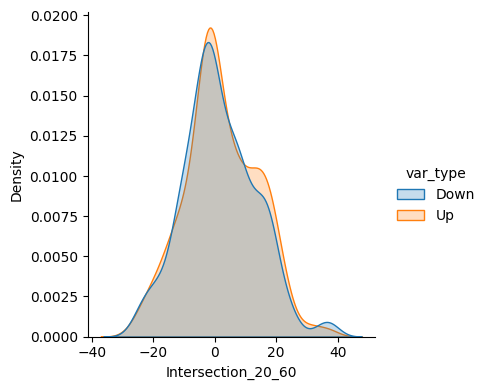

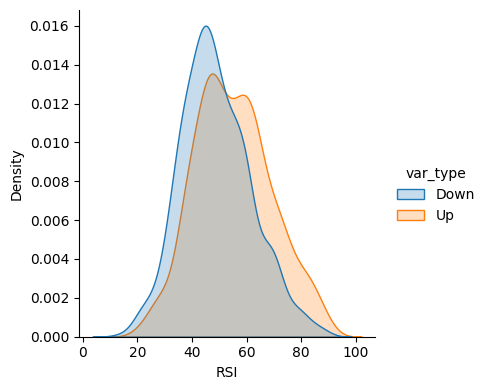

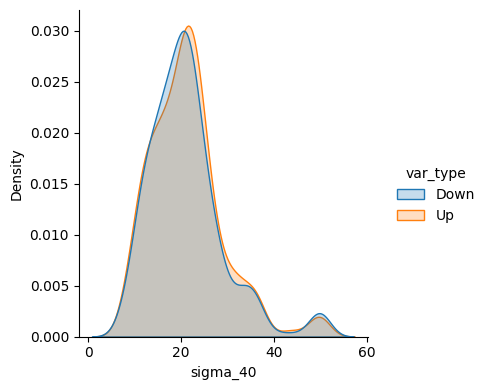

In [12]:
for feature in features:
    sns.displot(data=data,x=feature,hue='var_type',kind='kde',height=4,fill=True)

Y para los expost

/tmp/ipykernel_9389/707934796.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('fw_10_type').mean().loc[:,features].round(2)
/tmp/ipykernel_9389/707934796.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deviations = data.groupby('fw_10_type').std().loc[:,features].round(2)


Medias según clasificacion de fw_10 
             Intersection_20_60    RSI  sigma_40
fw_10_type                                     
Down                      1.90  50.08     20.36
Up                        1.64  53.48     21.72 

Desvios según clasificacion de fw_10 
             Intersection_20_60    RSI  sigma_40
fw_10_type                                     
Down                     11.41  12.64      6.79
Up                       12.32  14.52      8.94 



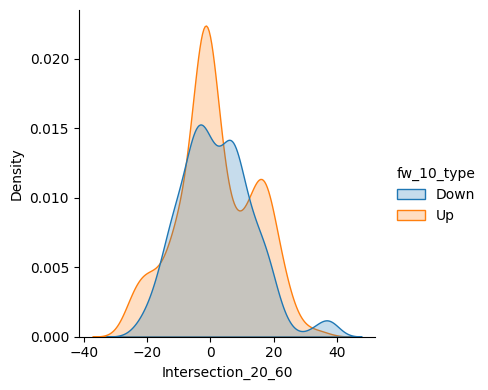

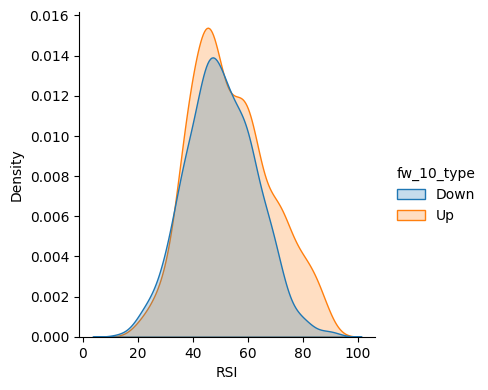

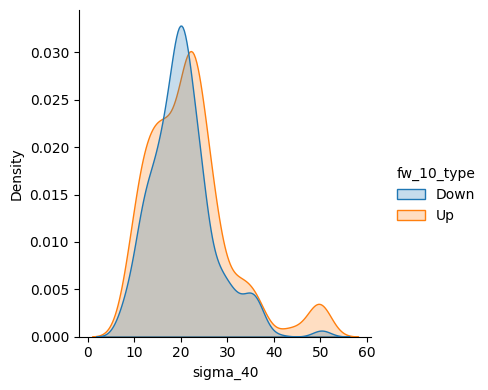

In [13]:
data['fw_10_type'] = np.where(data.fw_10>0,'Up','Down')
means = data.groupby('fw_10_type').mean().loc[:,features].round(2)
deviations = data.groupby('fw_10_type').std().loc[:,features].round(2)
print(f"Medias según clasificacion de fw_10 \n {means} \n")
print(f"Desvios según clasificacion de fw_10 \n {deviations} \n")
for feature in features:
    sns.displot(data=data,x=feature,hue='fw_10_type',kind='kde',height=4,fill=True)

/tmp/ipykernel_9389/3979650237.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('fw_20_type').mean().loc[:,features].round(2)
/tmp/ipykernel_9389/3979650237.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deviations = data.groupby('fw_20_type').std().loc[:,features].round(2)


Medias según clasificacion de fw_20 
             Intersection_20_60    RSI  sigma_40
fw_20_type                                     
Down                      1.90  50.08     20.36
Up                        1.64  53.48     21.72 

Desvios según clasificacion de fw_20 
             Intersection_20_60    RSI  sigma_40
fw_20_type                                     
Down                     11.41  12.64      6.79
Up                       12.32  14.52      8.94 



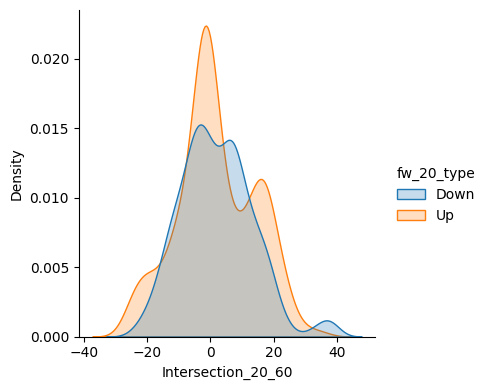

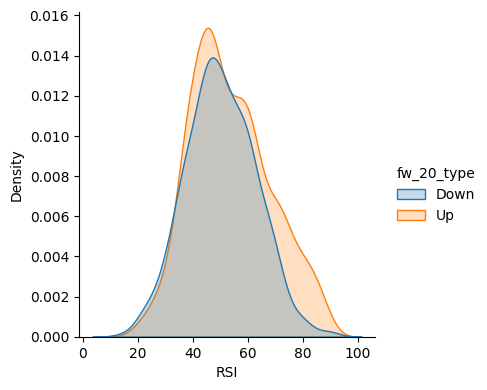

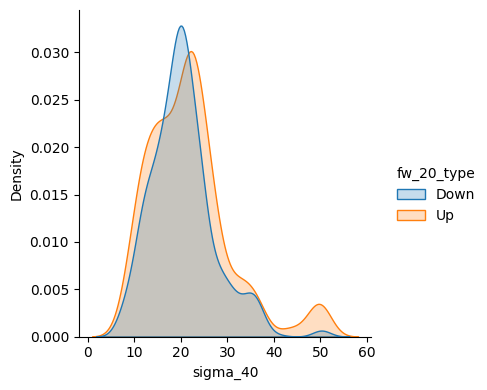

In [14]:
data['fw_20_type'] = np.where(data.fw_10>0,'Up','Down')
means = data.groupby('fw_20_type').mean().loc[:,features].round(2)
deviations = data.groupby('fw_20_type').std().loc[:,features].round(2)
print(f"Medias según clasificacion de fw_20 \n {means} \n")
print(f"Desvios según clasificacion de fw_20 \n {deviations} \n")
for feature in features:
    sns.displot(data=data,x=feature,hue='fw_20_type',kind='kde',height=4,fill=True)

Indicadores de Momentun (tren-following)

MACD


In [15]:
###MACD
def macd(ticker,slow,fast,suavizado):
    data = yf.download(ticker,auto_adjust=True)
    data["ema_fast"]=data.Close.ewm(span=fast).mean()
    data["ema_slow"]=data.Close.ewm(span=slow).mean()
    data["macd"]=data.ema_fast - data.ema_slow
    data['signal']=data.macd.ewm(span=suavizado).mean()
    data['histogram'] = data.macd- data.signal
    data = data.dropna().round(2)
    return data

macd('BTC-USD',23,12,9) #TODO: Check vs alphavantage API

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume,ema_fast,ema_slow,macd,signal,histogram
Date,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,21056800,457.33,457.33,0.00,0.00,0.00
2014-09-18,456.86,456.86,413.10,424.44,34483200,439.52,440.17,-0.66,-0.36,-0.29
2014-09-19,424.10,427.83,384.53,394.80,37919700,422.06,423.71,-1.65,-0.89,-0.76
2014-09-20,394.67,423.30,389.88,408.90,36863600,417.91,419.51,-1.61,-1.13,-0.47
2014-09-21,408.08,412.43,393.18,398.82,26580100,412.72,414.63,-1.90,-1.36,-0.54
...,...,...,...,...,...,...,...,...,...,...
2023-10-22,29918.65,30199.43,29720.31,29993.90,10446520040,28633.90,28062.92,570.98,347.33,223.65
2023-10-23,30140.69,34370.44,30097.83,33086.23,38363572311,29318.88,28481.53,837.34,445.33,392.01
2023-10-24,33077.30,35150.43,32880.76,33901.53,44934999645,30023.90,28933.20,1090.70,574.41,516.30


Osciladores trend-following

In [28]:
#RSI
def RSI(ticker, rounds):
    
    data = yf.download(ticker,auto_adjust=True,start = '2022-01-01')

    data['diff']= data.Close.diff()
    data['win']= np.where(data['diff']>0,data['diff'],0)
    data['loss']= np.where(data['diff']<0,abs(data['diff']),0)
    data['EMA_win'] = data.win.ewm(alpha=1/rounds).mean()
    data['EMA_loss'] = data.loss.ewm(alpha=1/rounds).mean()
    data['RS'] = data.EMA_win / data.EMA_loss
    data['RSI'] = 100 - (100 /(1+data.RS)) #TODO: Check vs alphavantage API
    data = data.reset_index().dropna().round(3)
    return data
data_w_RSI = RSI('BTC-USD',14) #TODO: Check vs alphavantage API
data_w_RSI


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume,diff,win,loss,EMA_win,EMA_loss,RS,RSI
1,2022-01-02,47680.926,47881.406,46856.938,47345.219,27951569547,-341.594,0.000,341.594,0.000,177.123,0.000,0.000
2,2022-01-03,47343.543,47510.727,45835.965,46458.117,33071628362,-887.102,0.000,887.102,0.000,431.521,0.000,0.000
3,2022-01-04,46458.852,47406.547,45752.465,45897.574,42494677905,-560.543,0.000,560.543,0.000,467.446,0.000,0.000
4,2022-01-05,45899.359,46929.047,42798.223,43569.004,36851084859,-2328.570,0.000,2328.570,0.000,896.777,0.000,0.000
5,2022-01-06,43565.512,43748.719,42645.539,43160.930,30208048289,-408.074,0.000,408.074,0.000,799.528,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2023-10-22,29918.654,30199.434,29720.312,29993.896,10446520040,75.484,75.484,0.000,241.286,82.872,2.912,74.435
660,2023-10-23,30140.686,34370.438,30097.828,33086.234,38363572311,3092.338,3092.338,0.000,444.933,76.952,5.782,85.255
661,2023-10-24,33077.305,35150.434,32880.762,33901.527,44934999645,815.293,815.293,0.000,471.387,71.456,6.597,86.837
662,2023-10-25,33916.043,35133.758,33709.109,34502.820,25254318008,601.293,601.293,0.000,480.666,66.352,7.244,87.870


Como es un oscilador acotado (permite comparar un dato de hoy con algo del pasado). Puedo construir un histograma

<AxesSubplot: ylabel='Frequency'>

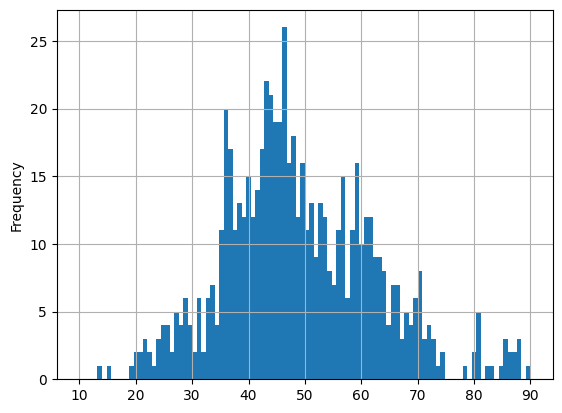

In [31]:

data_w_RSI.RSI.plot(kind='hist',grid=True,bins=100,range=(10,90))


Claramente no tiene forma de dist normal, pero corroboremos:

In [35]:
from scipy import stats
print(f"La kurtosis es {data.RSI.kurt():.2f}")
print(f"El skew es {data.RSI.skew():.2f}")
print(f"La media es {data.RSI.mean():.2f}")
print(f"El desvio estandar es {data.RSI.std():.2f}")
print(f"Prob de ser dist. normal: {stats.normaltest(data.RSI).pvalue:.5%}")




La kurtosis es -0.21
El skew es 0.32
La media es 51.94
El desvio estandar es 13.80
Prob de ser dist. normal: 0.00036%


Claramente se rechaza la H0 que nos decia que tenia forma de dist normal.
Podemos visualizar el indicador contra el grafico del activo

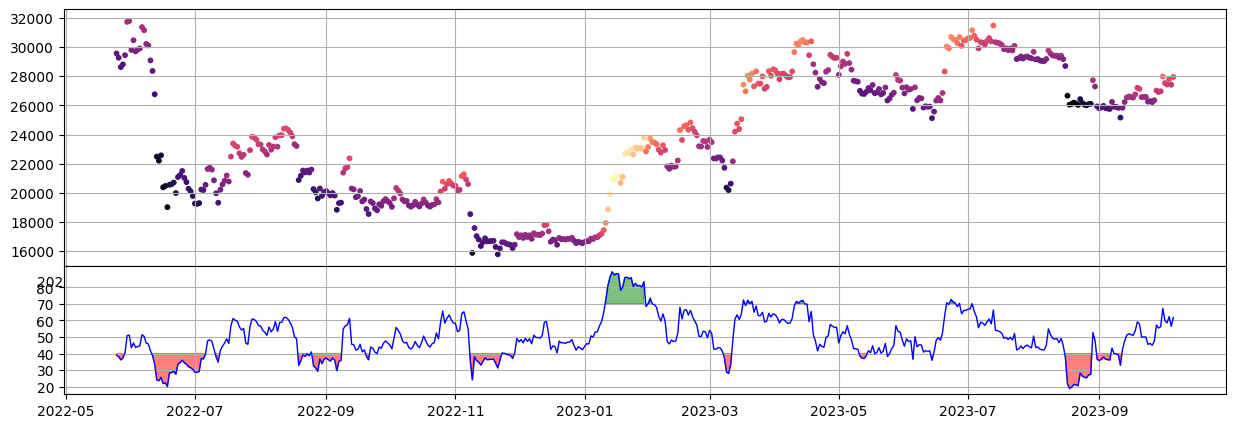

In [45]:
fig,ax = plt.subplots(figsize=(15,5),nrows=2,gridspec_kw={'height_ratios':[2,1]})

df = data.iloc[-500:]
ax[0].scatter(df.index,df.Close,s=10,cmap="magma",c=df.RSI/100)
ax[0].grid()

ax[1].plot(df.index, df.RSI, lw=1, color='b')
ax[1].set_yticks(range(10,90,10))

ax[1].fill_between(df.index,df.RSI,70,where=df.RSI>70,alpha=0.5,color='g')
ax[1].fill_between(df.index,df.RSI,40,where=df.RSI<40,alpha=0.5,color='r')

ax[1].grid()
plt.subplots_adjust(hspace=0)